In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<br>
### 3월 한 달간
대학원 학생회 단톡방 대화 데이터입니다. 

In [2]:
df = pd.read_csv('./data/skku_ds_chat_180331.csv')
df.date = pd.to_datetime(df.date)
df.head()

,date,who,msg
0,2018-03-03 21:08:00,방형욱교수님,학생회 활동을 위한 단톡방입입니다 ^^
1,2018-03-03 21:09:00,방형욱교수님,01082762050 박효진\n01032203146 조현욱\n01086621877 ...
2,2018-03-03 21:09:00,방형욱교수님,전화번호 목록에 빠진 분이 있을 수 있습니다.
3,2018-03-03 21:16:00,방형욱교수님,안녕하세요~ 한번 해주세요 ^^
4,2018-03-03 21:16:00,구동우,안녕하세요~


<br>
방형욱 교수님이 개설하신 이 단톡방에는  
3월 3일부터 3월 31일까지 총 538건의 메시지가 있었군요

In [3]:
df.count().date

538

<br>
3월 한 달의 간 채팅 수를 날짜별로 나누어 보면 이렇습니다

In [4]:
df['ymd'] = df.date.dt.date.astype('str')
df.groupby('ymd').count()[['msg']]

,msg
ymd,
2018-03-03,55
2018-03-04,54
2018-03-05,18
2018-03-06,15
2018-03-07,7
2018-03-08,31
2018-03-09,7
2018-03-10,10
2018-03-11,21


<br>
일단 눈으로 보기에도 대화가 활발한 날과 활발하지 않은 날이 주기적으로 반복되는 것 같습니다  
단톡방에 어떤 주제가 형성되면 한동안 신나게 이야기하다가 관심이 식으면서 대화가 줄어드는 건 아닐까요?  
대화 수가 많았던 날짜별로 나누보면 어떤 패턴을 발견할 수 있을 것 같습니다. 

<br>
### 첫 이틀 간의 대화
를 보니 서로 인사와 자기 소개를 주고 받았네요

In [5]:
target = df[(df.ymd == '2018-03-03') | (df.ymd == '2018-03-04')]
target

,date,who,msg,ymd
0,2018-03-03 21:08:00,방형욱교수님,학생회 활동을 위한 단톡방입입니다 ^^,2018-03-03
1,2018-03-03 21:09:00,방형욱교수님,01082762050 박효진\n01032203146 조현욱\n01086621877 ...,2018-03-03
2,2018-03-03 21:09:00,방형욱교수님,전화번호 목록에 빠진 분이 있을 수 있습니다.,2018-03-03
3,2018-03-03 21:16:00,방형욱교수님,안녕하세요~ 한번 해주세요 ^^,2018-03-03
4,2018-03-03 21:16:00,구동우,안녕하세요~,2018-03-03
5,2018-03-03 21:17:00,방형욱교수님,이제 저는 나갑니다 ^^,2018-03-03
6,2018-03-03 22:51:00,전상현,안녕하세요 전상현입니다,2018-03-03
7,2018-03-03 22:51:00,윤병도,안녕하세요 반갑습니다. 윤병도입니다,2018-03-03
8,2018-03-03 22:51:00,김준빈,안녕하세요~~!! 김준빈입니다~!,2018-03-03
9,2018-03-03 22:52:00,김대겸,안녕하세요! 김대겸이라고 합니다.,2018-03-03


<br>
시간 단위로 조금 더 작게 나누어 보죠

In [6]:
target['hour'] = target.date.dt.hour.astype('int')
target.hour[target.ymd == '2018-03-04'] = target.hour[target.ymd == '2018-03-04'] + 24
target.hour = target.hour.astype('int')
target['hour_delta'] = target.hour - target.hour.min()
target.drop('hour', axis=1, inplace=True)
target['td'] = target.date - target.date.min()
target['td_real'] = target.td.dt.total_seconds() / (60 * 60)

<br>
첫 대화가 시작된 이후 얼마나 시간이 지났는지 알 수 있는 컬럼을 추가하고

In [7]:
target.tail()

,date,who,msg,ymd,hour_delta,td,td_real
104,2018-03-04 19:33:00,Denial lee,안녕하세요? 이태호 입니다.\n저는 멀티미디어공학과를 전공했고,2018-03-04,22,0 days 22:25:00,22.416667
105,2018-03-04 20:52:00,지태훈,안녕하세요~ 지태훈 입니다.\n반도체물리학 전공했구요,2018-03-04,23,0 days 23:44:00,23.733333
106,2018-03-04 21:18:00,이길준,반도체분야분들이 많으시네요^^,2018-03-04,24,1 days 00:10:00,24.166667
107,2018-03-04 21:21:00,지태훈,네~ 전 반도체 업계에 직접적으로 있진 않지만 관심이 많이 있습니다,2018-03-04,24,1 days 00:13:00,24.216667
108,2018-03-04 22:26:00,김준식,안녕하세요 김준식입니다 경영학을 전공하고 잠깐 회계실무를 하다가 IT개발자로 전향하...,2018-03-04,25,1 days 01:18:00,25.300000


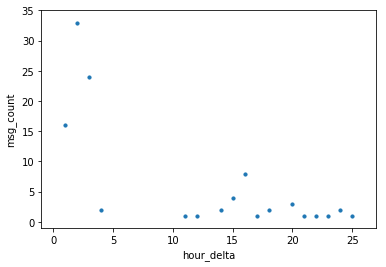

In [8]:
data = target.groupby('hour_delta').count()
data = data[data.index > 0]
plt.scatter(data.index, data.date, s=10)
plt.xlim(-1, 27)
plt.ylim(-1, 35)
plt.xlabel('hour_delta')
plt.ylabel('msg_count')
plt.show()

scatter plot으로 보니 확실히 시간이 지남에 따라 첫인사를 건내는 메시지의 개수가 줄어들고 있네요  
채팅방 개설 되자마자 3시간 이내에 많은 인사 메시지가 올라오다가  
그 다음날 오전부터 미처 인삿말을 전하지 못한 분들의 메시지가 조금씩 올라오고 있습니다

<br>
일단 눈으로 보기에도  
성균관대학교 데이터사이언스융합학과 학생 단톡방의 첫인사 메시지는 `지수함수` 를 떠올리게 합니다

\begin{align}
f(x) = e^{-x} \\
\end{align}
<p>
<center>exponetially decaying function</center>

<br>

지난 스터디 시간에 다루었던 소개팅 남녀의 나이 분포 데이터와 비교해보면 확실히 다릅니다

In [9]:
x = np.array([26, 25, 29, 30, 26, 35, 31, 28, 26, 30])
y = np.array([32, 28, 29, 29, 27, 38, 31, 33, 28, 32])

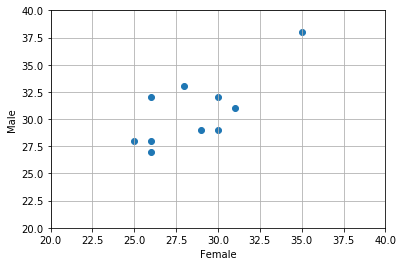

In [10]:
plt.scatter(x, y)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')
plt.grid()
plt.show()

<br>
곧게 뻗은 `1차원 선형 함수` 보다  
자연 상수 $e$의 지수에 적절한 식을 넣어 `지수 함수`를 만들면  
단톡방에서의 첫인삿말 분포를 쉽게 모델링 할 수 있을 것 같습니다

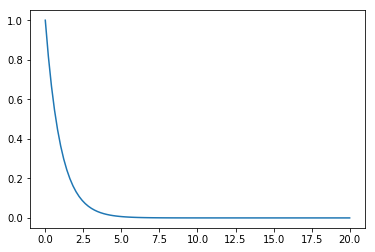

In [11]:
f = lambda x: np.e ** (-x)
x_space = np.linspace(0, 20, 100)
y_space = [f(x) for x in x_space]
plt.plot(x_space, y_space)
plt.show()

<br>
### 그럴싸해 보이는
간단한 지수 함수로 선을 그어봤더니 썩 나쁘지 않네요

\begin{align}
f(x) = e^{-0.6x + 4.5}
\end{align}

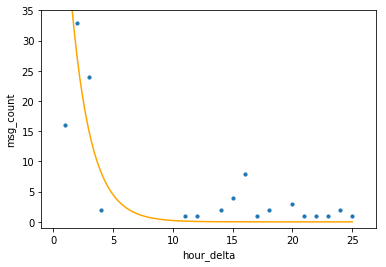

In [12]:
data = target.groupby('hour_delta').count()
data = data[data.index > 0]
plt.scatter(data.index, data.date, s=10)
plt.xlim(-1, 27)
plt.ylim(-1, 35)
plt.xlabel('hour_delta')
plt.ylabel('msg_count')

f = lambda x: np.e ** (- 0.6 * x + 4.5)
x_space = np.linspace(data.index.min(), data.index.max(), 100)
y_space = [f(x) for x in x_space]
plt.plot(x_space, y_space, c='orange')
plt.show()

<br>
### 지수 함수의 점근선이
$y = 0$ 인데 반해 우리 단톡방은 조금씩이라도 채팅이 올라오고 있으니까 constant를 좀 추가해 볼까요

\begin{align}
f(x) = e^{-0.6x + 4.5} + 2
\end{align}
<br>

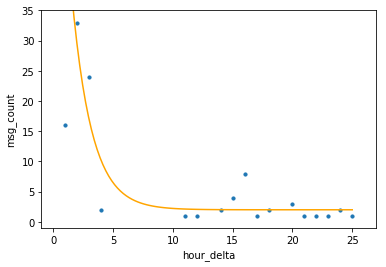

In [13]:
data = target.groupby('hour_delta').count()
data = data[data.index > 0]
plt.scatter(data.index, data.date, s=10)
plt.xlim(-1, 27)
plt.ylim(-1, 35)
plt.xlabel('hour_delta')
plt.ylabel('msg_count')

f = lambda x: np.e ** (- 0.6 * x + 4.5) + 2
x_space = np.linspace(data.index.min(), data.index.max(), 100)
y_space = [f(x) for x in x_space]
plt.plot(x_space, y_space, c='orange')
plt.show()

<br>
훨씬 좋군요!  
눈대중으로 만으로 단체 카톡방의 시간 경과에 따른 채팅 갯수  
변화를 예측할 수 있는 그럴싸한 회귀 모델이 만들어졌습니다

<br>
### 양수 공간에서
측정하고자 하는 값이 `자연스럽게` 감소할 때 그 분포는 `지수` 함수를 따른다는 가정은  
우리의 첫인사에도 마찬가입니다!  
발생 횟수, 시간에 따른 대상의 변화를 측정한 데이터라면 그 분포가  `exponential` 인지 확인해 봐야합니다.  
사실 세상의 아주 많은 데이터가 `exponential` 시그널을 보입니다.
> 지수 분포에 대해서는 다음 스터디에 더 자세히 다루죠 :)  



<br>
### 이 문제를 익숙한 선형 방정식으로
풀어볼까요? $\log$ scale을 활용하면 됩니다
<br>
식을 조금 전개해보면

\begin{equation}
f(x) = e^{-0.6x + 4.5} + 2 \\
f(x) - 2 = e^{-0.6x + 4.5} \\
\log _e(f(x) - 2) = \log _e(e^{-0.6x + 4.5}) \\
\ln(f(x) - 2) = -0.6x + 4.5 \\
\end{equation}
<br>
$$f^\prime(x) = -0.6x + 4.5$$
<br>

그런데 우리가 가진 데이터는 이 선형 회귀식을 바로 적용할 수 없습니다  
식을 전개하는 과정에서 원래는 `양수 공간`에 있던 메시지 횟수가 `0 이하` 로 줄어들기 때문이죠

In [14]:
data = target.groupby('hour_delta').count()
data = data[data.index > 0]
scale_df = pd.DataFrame([data.date, data.date - 2], index=['origin', '-2'])
scale_df

hour_delta,1,2,3,4,11,12,14,15,16,17,18,20,21,22,23,24,25
origin,16,33,24,2,1,1,2,4,8,1,2,3,1,1,1,2,1
-2,14,31,22,0,-1,-1,0,2,6,-1,0,1,-1,-1,-1,0,-1


\begin{equation}
\log_2 (0) = ? \\
\log_2 (-1) = ? \\
\end{equation}
<br>
2에 어떤 수를 곱해야 -1이 될까요?  
실수 공간에서 그런 수는 없습니다.

그러니까 `exponential` 차원을 `linear` 차원으로 변환하기 위해서는  
반드시 아래 조건을 확인해야 합니다  
$(x, y) > 0$

<br>
그렇지 않으면 이렇게 해괴한 상황이 펼쳐집니다...

In [15]:
np.log(data.date - 2)

hour_delta
1     2.639057
2     3.433987
3     3.091042
4         -inf
11         NaN
12         NaN
14        -inf
15    0.693147
16    1.791759
17         NaN
18        -inf
20    0.000000
21         NaN
22         NaN
23         NaN
24        -inf
25         NaN
Name: date, dtype: float64

<br>
### 양수 공간에서 Log 변환
은 아무런 문제가 없으니까 원래 더했던 constant는 무시하고 그냥 log scale을 적용해서  
Linear Equation을 만들어보죠

\begin{equation}
y = e^{(equation)} \\
ln(y) = ln(e^{(equation)}) \\
g(x) = ax + b
\end{equation}

<br>
\begin{equation}
g(x) = -0.15x + 3.5
\end{equation}
<br>

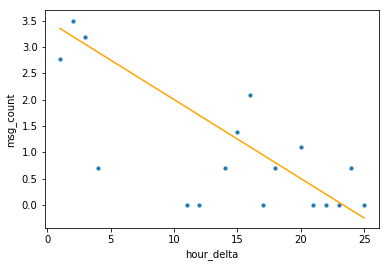

In [16]:
data = target.groupby('hour_delta').count()
data = data[data.index > 0]
plt.scatter(data.index, np.log(data.date), s=10)
plt.xlabel('hour_delta')
plt.ylabel('msg_count')

f = lambda x: -0.15 * x + 3.5
x_space = np.linspace(np.log(data.date).index.min(), np.log(data.date).index.max(), 100)
y_space = [f(x) for x in x_space]
plt.plot(x_space, y_space, c='orange')
plt.show()

<br>
Log scale로 변환된 데이터는 직선으로 곧게 펴지면서 $e^{ax + b}$ 보다는 $ax + b$ 식이  
더 어울리는 형태로 변환 되었습니다

이런 상황을 생각하면 쉽겠네요

<center>normal scale</center>
$$1\space\space 10 \space\space 100 \space\space 1000 \space\space 10000$$
<br>
<center>log scale</center>
$$\log_{10}{(10^0)}\space\space \log_{10}{(10^1)} \space\space \log_{10}{(10^2)} \space\space \log_{10}{(10^3)} \space\space \log_{10}{(10^4)}$$
$$ = 0\space\space 1 \space\space 2 \space\space 3 \space\space 4$$

<br>
대화 시간의 경과에 따른 카톡 분포를 1차원 밀도 함수로 그려보면  
역시 exponential decay 임을 눈으로 확인할 수 있습니다

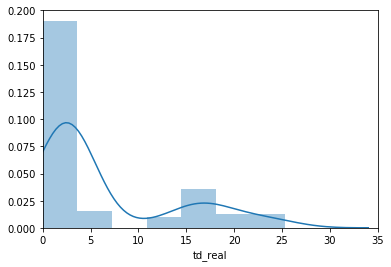

In [17]:
sns.distplot(target.td_real)
plt.xlim(0, 35)
plt.show()

In [18]:
sp.stats.normaltest(target.td_real)

NormaltestResult(statistic=22.57934271313865, pvalue=1.2501382039979409e-05)

<br>
### 조금 더 정규분포에 가깝게
인삿말 분포를 교정하기 위해서는 log scale을 적용할 수 있겠네요

In [19]:
target.head()

,date,who,msg,ymd,hour_delta,td,td_real
0,2018-03-03 21:08:00,방형욱교수님,학생회 활동을 위한 단톡방입입니다 ^^,2018-03-03,0,00:00:00,0.000000
1,2018-03-03 21:09:00,방형욱교수님,01082762050 박효진\n01032203146 조현욱\n01086621877 ...,2018-03-03,0,00:01:00,0.016667
2,2018-03-03 21:09:00,방형욱교수님,전화번호 목록에 빠진 분이 있을 수 있습니다.,2018-03-03,0,00:01:00,0.016667
3,2018-03-03 21:16:00,방형욱교수님,안녕하세요~ 한번 해주세요 ^^,2018-03-03,0,00:08:00,0.133333
4,2018-03-03 21:16:00,구동우,안녕하세요~,2018-03-03,0,00:08:00,0.133333


방형욱 교수님이 첫 메시지를 남긴 time delta가 0 이니까  
0.2 정도 작은 숫자를 더해서 log 변환을 해보겠습니다  
<br>

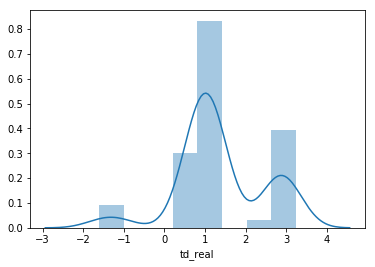

In [20]:
sns.distplot(np.log(target.td_real + 0.2))
plt.show()

In [21]:
sp.stats.normaltest(np.log(target.td_real + 0.2))

NormaltestResult(statistic=2.5447715886908235, pvalue=0.2801624138967464)

신뢰도 5% 수준에서 정규분포라고 봐도 충분한
안정적인 데이터로 변형 되었네요!  

<br>
### 잠깐...
애초에 데이터의 분포가 `exponential`인 것을 알았는데 대체 왜 `linear equation`으로 변환하고  
또 그게 정규 분포랑 무슨 상관인지 모르겠다!  

<br>
이해합니다.  

<br>
수학적 최적화 접근과 통계적 확률 모형론이 만나는 재미있는 지점이네요!  
답답함은 이해하지만 자세한 얘기는 다음 스터디에 해보도록 하고  
우선은 이렇게만 정리해보겠습니다

<br>
### Why Log Scale?
1. `지수 함수` 는 오차를 최적화 하는 과정에서 너무 `민감합니다`  
> 99 와 1의 차이는 98, 99와 100의 차이는 1  
> 데이터의 스캐일이 애초에 exponential일 때 이걸 그대로 두는건 샘플들 간 오차를 크게 벌립니다.  
> 아무튼 이건 나중에!  
2. $y = aX + b$ 꼴의 `polinomial`을 만들어야 최적화 알고리즘을 구현할 수 있습니다.
> 이것도 일단 나중에... 2주 후 스터디에서 다루겠습니다.  
3. $y = aX + b$ 회귀 식 `조건부 정규성 가정` 을 만족시킬 수 있습니다
> 이것도 2주 후 스터디에서 다루겠습니다 :)

<br>
#### 주입식 Point
변환할 때 데이터가 보이는 `exponential` 시그널을 `log` 변환을 통해 `linear` scale로 변환할 수 있다

<center>normal scale</center>
$$1\space\space 10 \space\space 100 \space\space 1000 \space\space 10000$$
<br>
<center>log scale</center>
$$\log_{10}{(10^0)}\space\space \log_{10}{(10^1)} \space\space \log_{10}{(10^2)} \space\space \log_{10}{(10^3)} \space\space \log_{10}{(10^4)}$$
$$ = 0\space\space 1 \space\space 2 \space\space 3 \space\space 4$$

<br>
지금 가진 궁금증을 다음 스터디 시간에 재밌게 해결해보도록 하겠습니다 :)